In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('data.csv')

In [6]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
len(df)

11914

In [8]:
df.shape


(11914, 16)

In [9]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [10]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [11]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [12]:
string_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [13]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [14]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

<AxesSubplot:xlabel='msrp', ylabel='Count'>

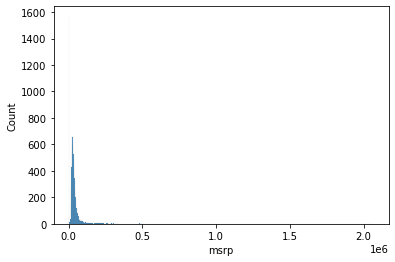

In [15]:
sns.histplot(df.msrp)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

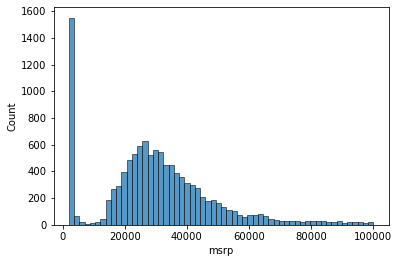

In [16]:
sns.histplot(df.msrp[df.msrp < 100000])

In [17]:
log_price = np.log1p(df.msrp)


<AxesSubplot:xlabel='msrp', ylabel='Count'>

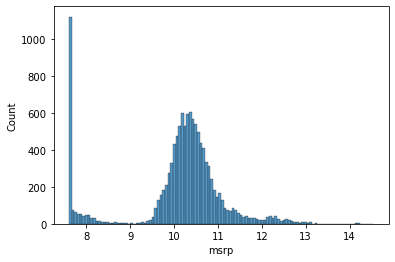

In [18]:
sns.histplot(log_price)

###### It is good for our target distribution to look like the normal distribution, like bell-shaoed, our model will be able to deal with the effectively, more reason of the tranformation done earlier

#### Checking for missing values

In [19]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### Validation Framework

###### We set up a validation famework so that the models we train are good and they ca generalize, that is, the model can be applied to new, unseen data

We split the dataset in such a way that 20percent goes to Validation, 20perent goes to test and remaining 60percent goes to train

In [20]:
#getting number of rows in dataframe
n = len(df)
n

11914

In [21]:
#calculating number of rows that will go to train, validation and test
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

In [22]:
n_val

2382

In [23]:
n_test

2382

In [24]:
n_train

7150

In [25]:
#next, we do a random seed that makes sure that the results are reproducible
#also, creating an array with indices 0 to (n-1)
np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)

In [26]:
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [27]:
#now getting a shuffled dataframe
df_shuffled = df.iloc[idx]
df_shuffled

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385,2052
11798,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640,25995
6637,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851,29100
2575,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,22200


now we split our shuffled dataframe into train, validation and test

In [28]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

In [29]:
#just a side note

x = np.arange(5)
print('before shuffle', x)
np.random.shuffle(x)
print('after shuffle', x)

before shuffle [0 1 2 3 4]
after shuffle [1 2 0 4 3]


In [30]:
#the random seed function makes sure that our results are the same each time we run it
np.random.seed(2)
x = np.arange(5)
print('before shuffle', x)
np.random.shuffle(x)
print('after shuffle', x)

before shuffle [0 1 2 3 4]
after shuffle [2 4 1 3 0]


###### iloc function is being used to access a row in a dataframe

##### Now that our datafram has being splitted, we can remove the effect of the long tail we saw earlier on each individual dataframes and to also avoid accidentally using the target variable in training our model, we can as well delete from our dataframes

In [31]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [32]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [33]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

#### Doing Machine Learning for Regression

##### Linear regression implemented with Numpy

In [34]:
def train_linear_regression(X, y):
    #adding the dummy column
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    #normal eqn formula
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

#### Predicting the price

##### Baseline Solution

In [35]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df_num = df_train[base]

In [36]:
df_num = df_num.fillna(0)

###### converting the dataframe to a numpy array

In [37]:
X_train = df_num.values

###### using our function to train the model

In [39]:
w_0, w = train_linear_regression(X_train, y_train)

###### seeing how well our data predicts

In [40]:
y_pred = w_0 + X_train.dot(w)

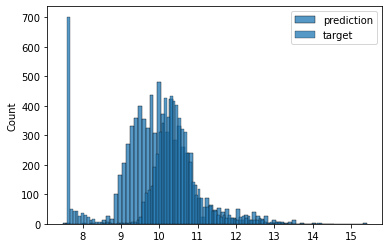

In [41]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='target')
plt.legend()

###### We can see from the plot that the distribution of values we predicted looks quite different from the actual values. This result may indicate that the model is not powerful enough to capture the distribution of the target variable. This shouldn’t be a surprise to us: the model we used is quite basic and includes only five very simple features.

##### RMSE:Evaluating our Model Quality

In [42]:
def rmse(y,y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [43]:
rmse(y_train, y_pred)

0.7554192603920132

##### Validating the model

In [44]:
df_num = df_val[base]
df_num = df_num.fillna(0)
X_val = df_num.values

In [45]:
y_pred = w_0 + X_val.dot(w)

In [46]:
rmse(y_val, y_pred)

0.7616530991301601

###### Writing a function to convert a dataframe into a matrix

In [47]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [48]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 0.7616530991301601


##### Simple Feature Engineering

###### First, we create a new feature, “age,” from the feature “year.” The age of a car should be very helpful when predicting its price: intuitively, the newer the car, the more expensive it should be. Because the dataset was created in 2017 (which we can verify by checking df_train.year.max()), we can calculate the age by subtracting the year when the car was made from 2017:

###### We already know that we will need to apply the same preprocessing twice: to the training and validation sets. Because we don’t want to repeat the feature extraction code multiple times, let’s put this logic into the prepare_X function.

In [50]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    df['age'] = 2017 - df.year
    features.append('age')
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [51]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 0.5172055461058335


###### The validation error is 0.517, which is a good improvement from 0.76 — the value we had in the baseline solution. Thus, we conclude that adding “age” is indeed helpful when making predictions. We can also look at the distribution of the predicted values:

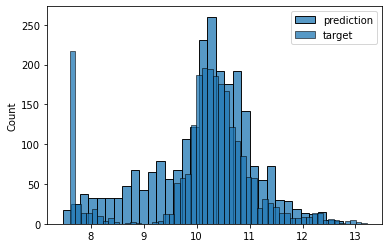

In [52]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_val, label='target')
plt.legend()

##### Handling Categorical Variables

###### For the Categorical variables such as Num_of_doors, make, we use one hot encoding, we add them to the prepare_X function

In [63]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)
    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

###### Checking whether there is an increase in our rmse value

In [64]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 0.5076038849557034


###### We can use a few more variables: engine_fuel_type, transmission_type, driven_ wheels, market_category, vehicle_size, and vehicle_style.

In [72]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)
    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)
    for v in ['regular_unleaded', 'premium_unleaded_(required)','premium_unleaded_(recommended)','flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)
    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)
    for v in ['front_wheel_drive', 'rear_wheel_drive','all_wheel_drive', 'four_wheel_drive']:
        feature = 'is_driven_wheels_%s' % v
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)
    for v in ['crossover', 'flex_fuel', 'luxury','luxury,performance', 'hatchback']:
        feature = 'is_mc_%s' % v
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)
    for v in ['compact', 'midsize', 'large']:
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)
    for v in ['sedan', '4dr_suv', 'coupe', 'convertible','4dr_hatchback']:
        feature = 'is_style_%s' % v
        df[feature] = (df['vehicle_style'] == v).astype(int)
    
    features.append(feature)
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [73]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 66.90574169837828


##### This is very bad as adding more and more didn't help us at all, there is a high jump in the rmse score

#### Regularization

In [74]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [75]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 0.4645191779176316


###### Sometimes, when adding a new feature causes performance degradation, simply removing this feature may be enough to solve the problem. Having a validation dataset is important to decide whether to add regularization, remove the feature, or do both: we use the score on the validation data to choose the best option. In our particular case, we see that adding regularization helps: it improves the score we had previously. We tried using r=0.001, but we should try other values as well. Let’s try a couple of differentones to select the best parameter r:

In [76]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

 1e-06 0.4645175886324435
0.0001 0.46451771923375285
 0.001 0.4645191779176316
  0.01 0.4645338392694503
   0.1 0.4646834312404934
     1 0.46631375865042174
     5 0.47343290305781355
    10 0.4811669698681283


###### We also notice that the performance for values below 0.1 don’t change much except in the sixth digit, which we shouldn’t consider to be significant. Let’s take the model with r=0.01 as the final model. Now we can check it against the test dataset to verify if the model works:

In [77]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))


X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 0.4645338392694503
test: 0.4589505719184505


###### Because these two numbers are pretty close, we conclude that the model can generalize well to the new unseen data.

#### Using the Model

###### suppose we get an input from our website, in the form of the following:

In [78]:
ad = {
'city_mpg': 18,'driven_wheels': 'all_wheel_drive',
'engine_cylinders': 6.0,
'engine_fuel_type': 'regular_unleaded',
'engine_hp': 268.0,
'highway_mpg': 25,
'make': 'toyota',
'market_category': 'crossover,performance',
'model': 'venza',
'number_of_doors': 4.0,
'popularity': 2031,
'transmission_type': 'automatic',
'vehicle_size': 'midsize',
'vehicle_style': 'wagon',
'year': 2013
}

###### We want to suggest the price of this car using our model

In [79]:
df_test = pd.DataFrame([ad])
X_test = prepare_X(df_test)

In [80]:
y_pred = w_0 + X_test.dot(w)

In [82]:
y_pred

array([10.22644376])

###### this is not the real price but the logarithm of the real price

In [83]:
suggestion = np.expm1(y_pred)
suggestion

array([27623.09716005])

###### The output is 28,294.13. The real price of this car is $31,120, so our model is not far from the actual price.